In [2]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

os.chdir(r'C:\Users\tdrown\Desktop\Data Center Blog Post\Energy Cost Data')

In [3]:
us_elec_file = r"C:\Users\tdrown\Desktop\Data Center Blog Post\Energy Cost Data\Average_retail_price_of_electricity_United_States_monthly.csv"
us_elec_head = ['month', 'commercial', 'industrial']

va_file = r"C:\Users\tdrown\Desktop\Data Center Blog Post\Energy Cost Data\Average_retail_price_of_electricity_monthly_Virginia.csv"
va_head = ['month', 'us_all', 'va_all', 'commercial', 'industrial']

In [4]:
us_elec = pd.read_csv(us_elec_file, skiprows=5, names = us_elec_head)
va = pd.read_csv(va_file, skiprows=5, names=va_head)

In [5]:
print(us_elec.columns)
us_elec.head(5)

Index(['month', 'commercial', 'industrial'], dtype='object')


,month,commercial,industrial
0,Dec 2022,12.42,8.63
1,Nov 2022,12.50,8.31
2,Oct 2022,13.05,8.61
3,Sep 2022,13.45,9.22
4,Aug 2022,13.53,9.51


Index(['month', 'us_all', 'va_all', 'commercial', 'industrial'], dtype='object')


<AxesSubplot:xlabel='month'>

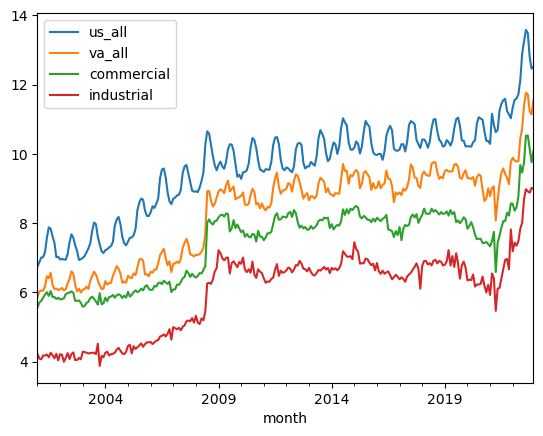

In [6]:
#Added after most analysis for US overall. 3/20/23
print(va.columns)
va.head(5)

va['month'] = pd.to_datetime(va['month'])
    
#Index as datetime
va = va.sort_values(by='month')
va.set_index('month', inplace=True)

va.plot()

In [7]:
#Cleaning
us_elec['month'] = pd.to_datetime(us_elec['month'])
#Convert Cents per KwH to $
for ii in ['commercial', 'industrial']:
    us_elec[ii] = us_elec[ii]/100

#Index as Datetime
us_elec = us_elec.sort_values(by='month')
us_elec.set_index('month', inplace=True)

In [8]:
us_elec.commercial

month
2001-01-01    0.0725
2001-02-01    0.0751
2001-03-01    0.0770
2001-04-01    0.0773
2001-05-01    0.0777
2001-06-01    0.0813
2001-07-01    0.0841
2001-08-01    0.0835
2001-09-01    0.0822
2001-10-01    0.0827
2001-11-01    0.0773
2001-12-01    0.0766
2002-01-01    0.0749
2002-02-01    0.0768
2002-03-01    0.0772
2002-04-01    0.0768
2002-05-01    0.0784
2002-06-01    0.0818
2002-07-01    0.0833
2002-08-01    0.0824
2002-09-01    0.0800
2002-10-01    0.0800
2002-11-01    0.0764
2002-12-01    0.0759
2003-01-01    0.0745
2003-02-01    0.0765
2003-03-01    0.0778
2003-04-01    0.0793
2003-05-01    0.0806
2003-06-01    0.0844
2003-07-01    0.0855
2003-08-01    0.0846
2003-09-01    0.0815
2003-10-01    0.0809
2003-11-01    0.0785
2003-12-01    0.0770
2004-01-01    0.0770
2004-02-01    0.0785
2004-03-01    0.0792
2004-04-01    0.0789
2004-05-01    0.0799
2004-06-01    0.0849
2004-07-01    0.0863
2004-08-01    0.0870
2004-09-01    0.0854
2004-10-01    0.0823
2004-11-01    0.0804
2004-12

<AxesSubplot:xlabel='month'>

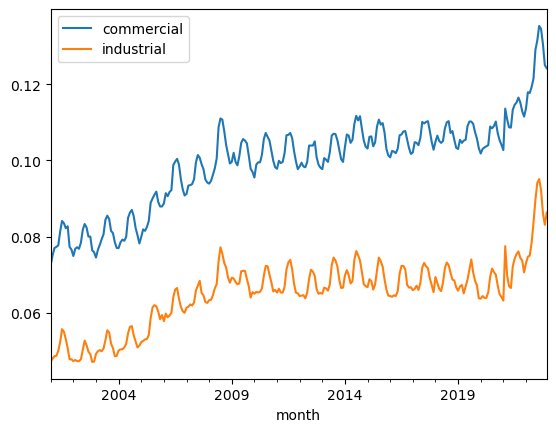

In [9]:
us_elec.plot()

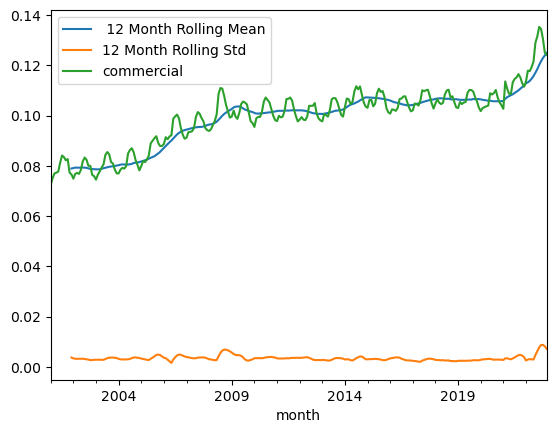

In [10]:
timeseries = us_elec['commercial']
timeseries.rolling(12).mean().plot(label = ' 12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

<Figure size 640x480 with 0 Axes>

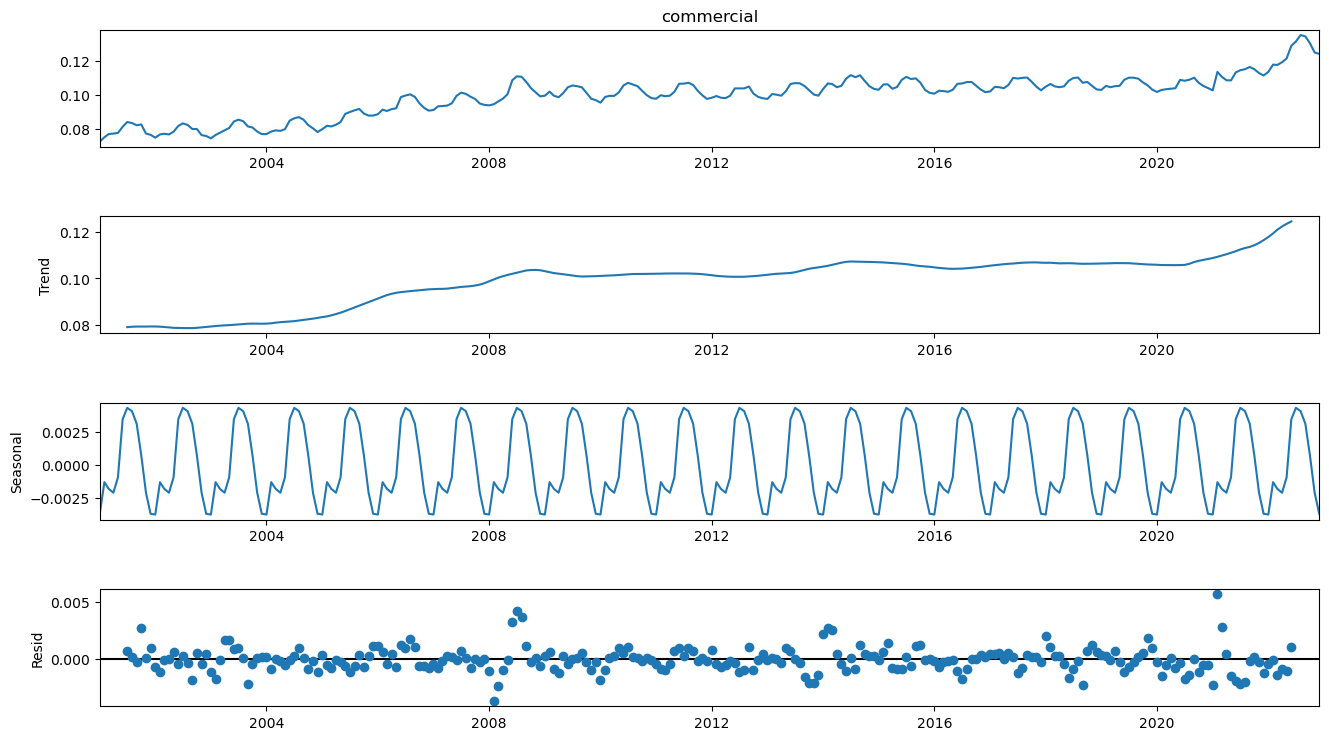

In [11]:
#Seasonality Trend - Quarter
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(us_elec['commercial'])
figure = plt.figure()
figure = decomposition.plot()
figure.set_size_inches(15, 8)

In [12]:
#Creating this for later, save to 'Test-Setup'
def check_adf(time_series):
    test_result = adfuller(us_elec['commercial'])
    print('ADF Test:')
    labels = ['ADF Statistic', 'p-value', 'No. of Lags Used', 'Number of Obs']

    for value,label in zip(test_result,labels):
        print (label+r':'+str(value))
    if test_result[1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary")


In [13]:
check_adf(us_elec['commercial'])

ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary


ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary
ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary
ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary
ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary
ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary


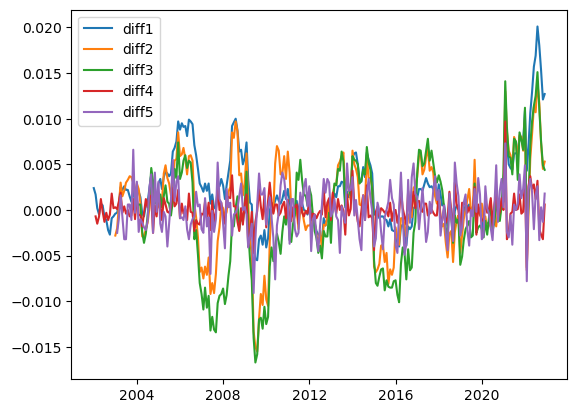

In [14]:
#Differencing to detrend
#No version of first or second differencing either through t-1 nor t-m allowed for stationality.
#Clear Seasonal Trend as well as possible linear/quadratic trend

us_elec['diff1'] = (us_elec['commercial'] - us_elec['commercial'].shift(12))
us_elec['diff2'] = (us_elec['commercial'] - us_elec['commercial'].shift(12)) - (us_elec['commercial'].shift(12) - us_elec['commercial'].shift(24))
us_elec['diff3'] = (us_elec['commercial'] - us_elec['commercial'].shift(12)) - (us_elec['commercial'].shift(12) - us_elec['commercial'].shift(24)) - (us_elec['commercial'].shift(24) - us_elec['commercial'].shift(36))
us_elec['diff4'] = (us_elec['commercial'] - us_elec['commercial'].shift(1)) - (us_elec['commercial'].shift(12) - us_elec['commercial'].shift(13))
us_elec['diff5'] = (us_elec['commercial'] - us_elec['commercial'].shift(1)) - (us_elec['commercial'].shift(12) - us_elec['commercial'].shift(13)) - (us_elec['commercial'].shift(24) - us_elec['commercial'].shift(25))

for d in [us_elec['diff1'], us_elec['diff2'], us_elec['diff3'], us_elec['diff4'], us_elec['diff5']]:
    check_adf(d.dropna())

plt.plot(us_elec['diff1'])
plt.plot(us_elec['diff2'])
plt.plot(us_elec['diff3'])
plt.plot(us_elec['diff4'])
plt.plot(us_elec['diff5'])
plt.legend(['diff1', 'diff2', 'diff3', 'diff4', 'diff5'])
plt.show()

In [15]:
#Trying removing linear trend
x = [i for i in range(1, len(us_elec)+1)]
x = np.reshape(x, (len(x), 1))
y = us_elec['commercial'].values
model = LinearRegression()
model.fit(x, y)
trend = model.predict(x)

#model seems to have a quadratic trend of degree 3
pf = PolynomialFeatures(degree=3)
xp = pf.fit_transform(x)
model2 = LinearRegression()
model2.fit(xp, y)
trendp = model2.predict(xp)

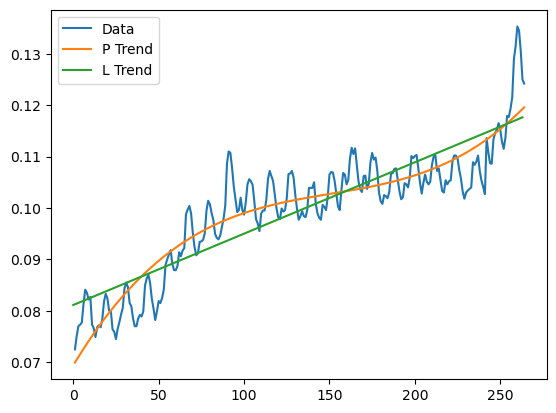

In [16]:
plt.plot(x, y)
plt.plot(x, trendp)
plt.plot(trend)
plt.legend(['Data', 'P Trend', 'L Trend'])
plt.show()

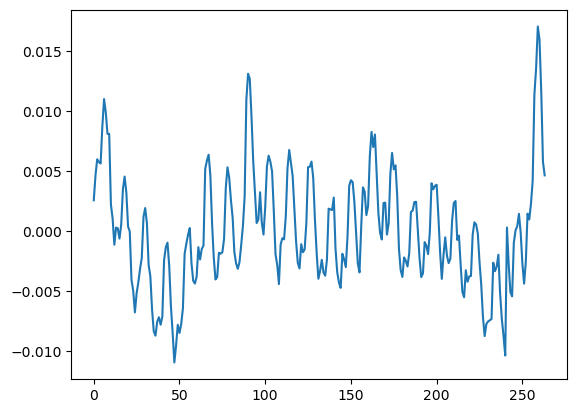

In [17]:
detrended = [y[i] - trend[i] for i in range(0, len(us_elec))]
detrendedp = [y[i] - trendp[i] for i in range(0, len(us_elec))]
plt.plot(detrendedp)
plt.show()

In [18]:
check_adf(detrendedp)

ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary


C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           commercial   No. Observations:                  264
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                1303.483
Date:                              Mon, 27 Mar 2023   AIC                          -2594.967
Time:                                      13:39:31   BIC                          -2573.814
Sample:                                  01-01-2001   HQIC                         -2586.454
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5353      0.026    -20.298      0.000      -0.587      -0.484
ma.L1          0.47

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RSME:  0.013298703615064744


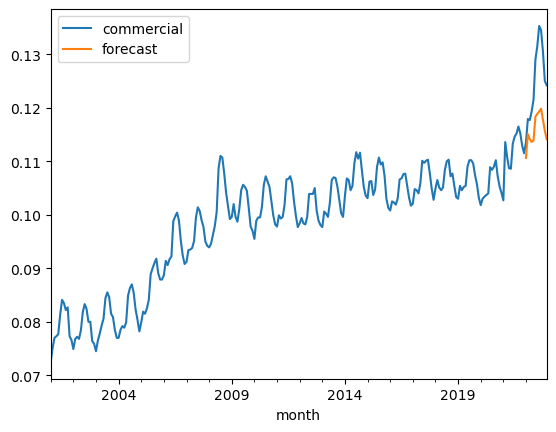

In [19]:
order = (1,1,2)
sorder = (1,1,1,12)

model = SARIMAX(us_elec['commercial'], order=order, seasonal_order=sorder)
ARIMAresult = model.fit()
print(ARIMAresult.summary())

us_elec['forecast'] = ARIMAresult.predict(start='2022-01-01', end = '2022-12-01', dynamic=True)
us_elec[['commercial', 'forecast']].plot()

#Validation
train = us_elec['commercial'].loc[us_elec.index < '2021-01-01'].copy()
test = us_elec['commercial'].loc[us_elec.index >= '2021-01-01'].copy()

sarima = SARIMAX(train, order=order, seasonal_order=sorder)
sarima = sarima.fit()
y_pred = sarima.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['prediction'] = sarima.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
rsme = np.sqrt(mean_squared_error(test.values, y_pred_df['prediction']))
print("RSME: ", rsme)



C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           commercial   No. Observations:                  252
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                1253.674
Date:                              Mon, 27 Mar 2023   AIC                          -2495.347
Time:                                      13:39:32   BIC                          -2474.488
Sample:                                  01-01-2001   HQIC                         -2486.941
                                       - 12-01-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7253      1.250     -0.580      0.562      -3.176       1.726
ma.L1          0.65

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RSME:  0.004014578478879197


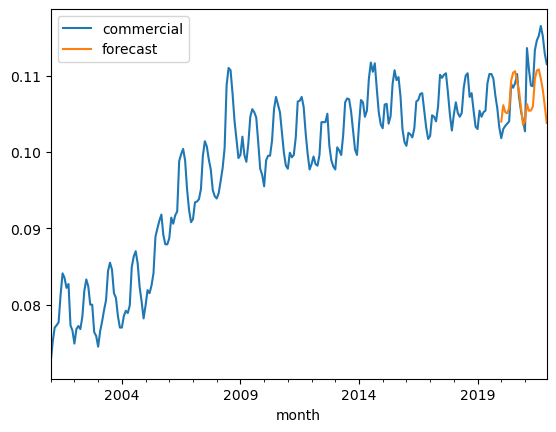

In [20]:
order = (1,1,2)
sorder = (1,1,1,12)

m2 = us_elec.loc[us_elec.index < '2022-01-01'].copy()
m2 = pd.DataFrame(m2)

model = SARIMAX(m2['commercial'], order=order, seasonal_order=sorder)
ARIMAresult = model.fit()
print(ARIMAresult.summary())

m2['forecast'] = ARIMAresult.predict(start='2020-01-01', end = '2021-12-01', dynamic=True)
m2[['commercial', 'forecast']].plot()

#Validation
train = m2['commercial'].loc[m2.index < '2020-01-01'].copy()
test = m2['commercial'].loc[m2.index >= '2020-01-01'].copy()

for df in [train, test]:
    df = pd.DataFrame(df)

sarima = SARIMAX(train, order=order, seasonal_order=sorder)
sarima = sarima.fit()
y_pred = sarima.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['prediction'] = sarima.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
rsme = np.sqrt(mean_squared_error(test.values, y_pred_df['prediction']))
print("RSME: ", rsme)


In [21]:
import time
start = time.time()

#differencing orders function
#Save this function for later
def differencing(timeseries, m):
    info = []
    #General Differencing
    for i in range(4):
        timeseries.name = f"d{i}_D0_m0"
        info.append(timeseries)
        timeseries = timeseries.diff()

    #seasonal (D=1) given d= {0,1,2}
    for i in m:
        for j in range(4):
            timeseries = info[j].diff(periods=i)
            timeseries.name = f"d{j}_D1_m{i}"
            info.append(timeseries)
            
    #seasonal differencing (D=2) given d={0,1,2}
    for i in m:
        for j in range(4):
            timeseries = info[j+3].diff(periods=i)
            timeseries.name = f"d{j}_D2_m{i}"
            
    #seasonal differencing (D=3) given d={0,1,2}
    for i in m:
        for j in range(4):
            timeseries = info[j+3].diff(periods=i)
            timeseries.name = f"d{j}_D3_m{i}"
    return pd.DataFrame(info).T
    
#Create the differenced series
diff = differencing(us_elec['commercial'], [12])
diff

def adf_summary(diff_series):
    from statsmodels.tsa.stattools import adfuller
    summary = []
    
    for i in diff_series:
        # unpack the results
        a, b, c, d, e, f = adfuller(diff_series[i].dropna())
        g, h, i = e.values()
        results = [a, b, c, d, g, h, i]
        summary.append(results)
    
    columns = ["Test Statistic", "p-value", "#Lags Used", "No. of Obs. Used",
               "Critical Value (1%)", "Critical Value (5%)", "Critical Value (10%)"]
    index = diff_series.columns
    summary = pd.DataFrame(summary, index=index, columns=columns)
    
    return summary


# create the summary
summary = adf_summary(diff)

# filter away results that are not stationary
summary_passed = summary[summary["p-value"] < 0.05]
summary_passed

# output indices as a list
index_list = pd.Index.tolist(summary_passed.index)

# use the list as a condition to select stationary time-series
passed_series = diff[index_list]

# sort the columns by names
ps = passed_series.sort_index(axis=1)
summary_passed

,Test Statistic,p-value,#Lags Used,No. of Obs. Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
d2_D0_m0,-14.616178,3.950985e-27,11,250,-3.456781,-2.873172,-2.572969
d3_D0_m0,-11.286458,1.414111e-20,16,244,-3.457438,-2.873459,-2.573122
d1_D1_m12,-6.662093,4.818499e-09,11,239,-3.458011,-2.873710,-2.573256
d2_D1_m12,-6.900540,1.285449e-09,15,234,-3.458608,-2.873972,-2.573396
d3_D1_m12,-6.253155,4.403685e-08,16,232,-3.458855,-2.874080,-2.573453


<AxesSubplot:title={'center':'Possible AR Terms'}, xlabel='nth lag', ylabel='Sum of PACF'>

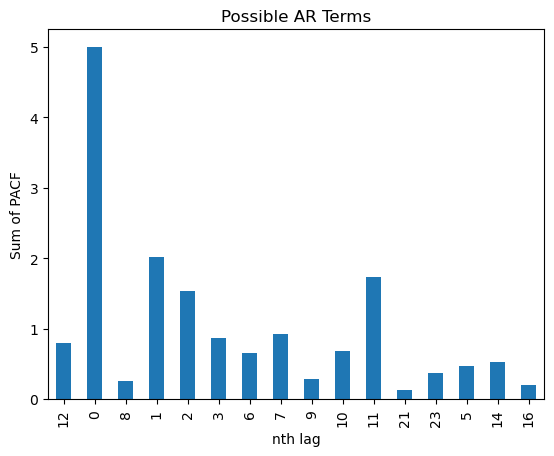

In [22]:
# ### Calculate ACF & PACF for the resulting series

# store all values of significant spikes by nlags in PACF plots
from statsmodels.tsa.stattools import pacf

# create an empty dataframe to store values
df_sp_p = pd.DataFrame()
AR = []
for i in ps:
    # unpack the results into PACF and their CI
    PACF, PACF_ci = pacf(ps[i].dropna(), alpha=0.05, method='ywm')
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    PACF_ci_ll = PACF_ci[:,0] - PACF
    PACF_ci_ul = PACF_ci[:,1] - PACF
    
    # find positions of significant spikes ~ possible value of p & P
    sp1 = np.where(PACF < PACF_ci_ll)[0]
    sp2 = np.where(PACF > PACF_ci_ul)[0]
    
    # PACF values of the significant spikes
    sp1_value = abs(PACF[PACF < PACF_ci_ll])
    sp2_value = PACF[PACF > PACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_p = pd.concat((df_sp_p, sp1_series, sp2_series), axis=1)


# store all values of significant spikes by nlags in ACF plots
from statsmodels.tsa.stattools import acf

# create an empty dataframe to store values
df_sp_q = pd.DataFrame()
MA = []
for i in ps:
    # unpack the results into ACF and their CI
    ACF, ACF_ci = acf(ps[i].dropna(), alpha=0.05)
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    ACF_ci_ll = ACF_ci[:,0] - ACF
    ACF_ci_ul = ACF_ci[:,1] - ACF
    
    # find positions of significant spikes ~ possible value of q & Q
    sp1 = np.where(ACF < ACF_ci_ll)[0]
    sp2 = np.where(ACF > ACF_ci_ul)[0]
    
    # ACF values of the significant spikes
    sp1_value = abs(ACF[ACF < ACF_ci_ll])
    sp2_value = ACF[ACF > ACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_q = pd.concat((df_sp_q, sp1_series, sp2_series), axis=1)


# visualize sums of values of significant spikes by nlags in ACF plots
#df_sp_q.iloc[1:].T.sum().plot(kind='bar', title='Possible MA Terms', xlabel='nth lag', ylabel='Sum of ACF')

# visualize sums of values of significant spikes by nlags in PACF plots
df_sp_p.iloc[1:].T.sum().plot(kind='bar', title='Possible AR Terms', xlabel='nth lag', ylabel='Sum of PACF')

In [23]:
def pdq_grid(p, d, q):
    pdq = []
    for i in p:
        for j in d:
            for k in q:
                
                pdq.append([i, j, k])
    return pdq
                
def PDQm_grid(P, D, Q, m):
    PDQm = []
    for i in P:
        for j in D:
            for k in Q:
                for l in m:
                    PDQm.append([i, j, k, l])
    return PDQm

p = [0, 1, 11]
d = [1, 2, 3]
#potentially check 11, 13, 24 for q
q = [0, 1]
P = [1]
D = [0, 1]
Q = [1]
m = [12]

pdq = pdq_grid(p, d, q)
PDQm = PDQm_grid(P, D, Q, m)

In [24]:
def SARIMA_grid(endog, order, seasonal_order):
    model_info = []
    
    #fit models
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels.tools.eval_measures import rmse
    for i in order:
        for j in seasonal_order:
            try:
                model = SARIMAX(endog=endog, order=i, seasonal_order=j)
                result = model.fit()
                predict = result.predict()
                
                #Eval Metrics MAPE, RMSE, AIC, and BIC
                
                MAPE = (abs((endog-predict)[1:])/(endog[1:])).mean() 
                RMSE = rmse(endog[1:], predict[1:])
                AIC = result.aic
                BIC = result.bic
                
                #list off order and sorder and metrics
                info = [i, j, MAPE, RMSE, AIC, BIC]
                model_info.append(info)
                
            except Exception as exc:
                print(traceback.format_exc())
                print(exc)
                continue
                
    columns = ['order', 'sorder', 'MAPE', 'RMSE', 'AIC', 'BIC']
    model_result = pd.DataFrame(data=model_info, columns=columns)
    return model_result

#Train Test Split
train = us_elec['commercial'].loc[us_elec.index < '2020-01-01'].copy()
test = us_elec['commercial'].loc[(us_elec.index >= '2020-01-01')].copy()

model_result = SARIMA_grid(endog=train, order=pdq, seasonal_order=PDQm)

end = time.time()

print(f'time required: {end - start}')

model_result.to_csv(r"C:\Users\tdrown\Desktop\Data Center Blog Post\Energy Cost Data\model_evaluation.csv")

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warni

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warni

time required: 26.028488159179688


In [25]:
least_MAPE = model_result.nsmallest(10, 'MAPE')
print(least_MAPE)

least_RMSE = model_result.nsmallest(10, 'RMSE')
print(least_RMSE)

least_AIC = model_result.nsmallest(10, 'AIC')
print(least_AIC)

least_BIC = model_result.nsmallest(10, 'BIC')
print(least_BIC)

L1 = model_result[model_result.MAPE == model_result.MAPE.min()]
L2 = model_result[model_result.RMSE == model_result.RMSE.min()]
L3 = model_result[model_result.AIC == model_result.AIC.min()]
L4 = least_BIC[least_BIC.MAPE == least_BIC.MAPE.min()]
pd.concat((L1, L2, L3, L4))

         order         sorder      MAPE      RMSE          AIC          BIC
14   [1, 1, 1]  [1, 0, 1, 12]  0.009396  0.001192 -2418.420633 -2401.295883
0    [0, 1, 0]  [1, 0, 1, 12]  0.009399  0.001192 -2421.780080 -2411.505230
12   [1, 1, 0]  [1, 0, 1, 12]  0.010246  0.001282 -2382.379476 -2368.679676
2    [0, 1, 1]  [1, 0, 1, 12]  0.010495  0.001322 -2368.912234 -2355.212434
26  [11, 1, 1]  [1, 0, 1, 12]  0.010521  0.001347 -2330.527933 -2279.153683
24  [11, 1, 0]  [1, 0, 1, 12]  0.010596  0.001361 -2326.844871 -2278.895571
27  [11, 1, 1]  [1, 1, 1, 12]  0.011844  0.002789 -2285.707052 -2235.147481
25  [11, 1, 0]  [1, 1, 1, 12]  0.011847  0.002789 -2287.884963 -2240.696031
13   [1, 1, 0]  [1, 1, 1, 12]  0.011987  0.002797 -2299.549539 -2286.066987
3    [0, 1, 1]  [1, 1, 1, 12]  0.011990  0.002797 -2299.648357 -2286.165805
         order         sorder      MAPE      RMSE          AIC          BIC
14   [1, 1, 1]  [1, 0, 1, 12]  0.009396  0.001192 -2418.420633 -2401.295883
0    [0, 1, 

,order,sorder,MAPE,RMSE,AIC,BIC
14,"[1, 1, 1]","[1, 0, 1, 12]",0.009396,0.001192,-2418.420633,-2401.295883
14,"[1, 1, 1]","[1, 0, 1, 12]",0.009396,0.001192,-2418.420633,-2401.295883
0,"[0, 1, 0]","[1, 0, 1, 12]",0.009399,0.001192,-2421.780080,-2411.505230
14,"[1, 1, 1]","[1, 0, 1, 12]",0.009396,0.001192,-2418.420633,-2401.295883


C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

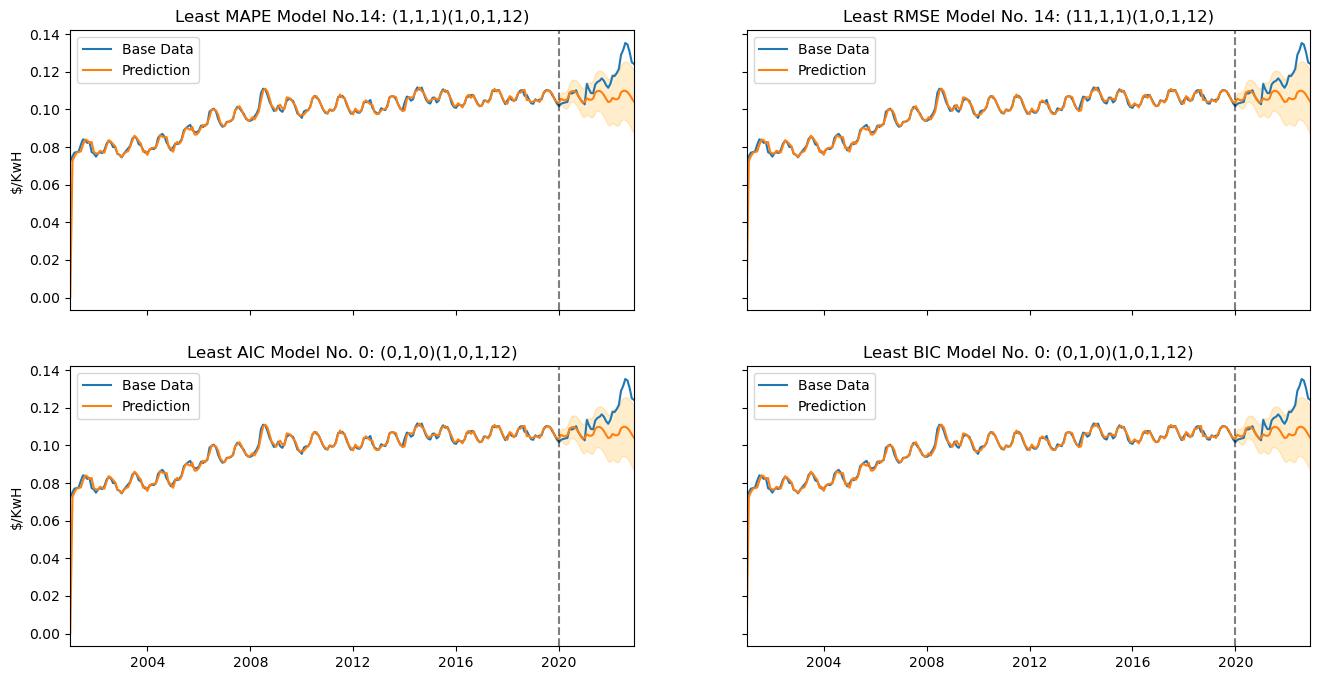

In [26]:
# fit the models of least MAPE, least RMSE, least AIC/BIC & least MAPE among least AIC/BIC
order_list = [(1,1,1), (1,1,1), (0,1,0), (0,1,0)]
seasonal_order_list = [(1,0,1,12), (1,0,1,12), (1,0,1,12), (1,0,1,12)]
y = us_elec['commercial']
pred_list = []
y1 = [] # prediction confidence interval lower boundary
y2 = [] # prediction confidence interval upper boundary

for i in range(4):
    model = SARIMAX(endog=train, order=order_list[i],
                    seasonal_order=seasonal_order_list[i])
    result = model.fit()
    pred_summary = result.get_prediction(y.index[0], y.index[-1]).summary_frame()
    pred_list.append(pred_summary['mean'])
    y1.append(pred_summary['mean_ci_lower'][test.index])
    y2.append(pred_summary['mean_ci_upper'][test.index])


# visualize the results of the fitted models
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8),
                        sharex=True, sharey=True)

titles = ['Least MAPE Model No.14: (1,1,1)(1,0,1,12)',
          'Least RMSE Model No. 14: (11,1,1)(1,0,1,12)',
          'Least AIC Model No. 0: (0,1,0)(1,0,1,12)',
          'Least BIC Model No. 0: (0,1,0)(1,0,1,12)']
k = 0
for i in range(2):
    for j in range(2):
        axs[i,j].plot(y, label='Base Data')
        axs[i,j].plot(pred_list[k], label='Prediction')
        axs[i,j].set_title(titles[k])
        axs[i,0].set_ylabel('$/KwH')
        axs[i,j].legend()
        axs[i,j].axvline(test.index[0], color='black', alpha=0.5, linestyle='--')
        axs[i,j].fill_between(x=test.index, y1=y1[k], y2=y2[k], color='orange', alpha=0.2)
        axs[i,j].set_xlim(left=y.index[0], right=y.index[-1])
        k += 1
plt.show()

In [27]:
from statsmodels.tools.eval_measures import rmse
gd_mod_cv = []
for i in least_AIC.index:
    model = SARIMAX(endog=train, order=least_AIC.order[i],
                    seasonal_order=least_AIC.sorder[i])
    result = model.fit()
    pred = result.get_prediction(test.index[0], test.index[-1]).summary_frame()['mean']
    CV_MAPE = (abs((test-pred))/(test)).mean()
    CV_RMSE = rmse(test, pred)
    CV_AIC = result.aic
    cv_result = [least_AIC.order[i], least_AIC.sorder[i], CV_AIC, CV_MAPE, CV_RMSE]
    gd_mod_cv.append(cv_result)

columns = ['order', 'seasonal_order', 'CV_AIC', 'CV_MAPE', 'CV_RMSE']
index = least_AIC.index
gd_mod_cv = pd.DataFrame(data=gd_mod_cv, index=index, columns=columns)


# Cross-validation results of the models
pd.concat((least_AIC, gd_mod_cv.iloc[:,2:]), axis=1).sort_values('CV_AIC')

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

,order,sorder,MAPE,RMSE,AIC,BIC,CV_AIC,CV_MAPE,CV_RMSE
0,"[0, 1, 0]","[1, 0, 1, 12]",0.009399,0.001192,-2421.780080,-2411.505230,-2421.780080,0.067130,0.011398
14,"[1, 1, 1]","[1, 0, 1, 12]",0.009396,0.001192,-2418.420633,-2401.295883,-2418.420633,0.067062,0.011384
12,"[1, 1, 0]","[1, 0, 1, 12]",0.010246,0.001282,-2382.379476,-2368.679676,-2382.379476,0.071268,0.012027
2,"[0, 1, 1]","[1, 0, 1, 12]",0.010495,0.001322,-2368.912234,-2355.212434,-2368.912234,0.071214,0.012035
18,"[1, 2, 1]","[1, 0, 1, 12]",0.012437,0.002604,-2354.393789,-2337.291114,-2354.393789,0.073080,0.012366
26,"[11, 1, 1]","[1, 0, 1, 12]",0.010521,0.001347,-2330.527933,-2279.153683,-2330.527933,0.065530,0.011114
24,"[11, 1, 0]","[1, 0, 1, 12]",0.010596,0.001361,-2326.844871,-2278.895571,-2326.844871,0.065459,0.011095
28,"[11, 2, 0]","[1, 0, 1, 12]",0.012872,0.002625,-2322.233712,-2274.346222,-2322.233712,0.076222,0.012859
6,"[0, 2, 1]","[1, 0, 1, 12]",0.014123,0.002682,-2301.796634,-2288.114494,-2301.796634,0.203820,0.031547
1,"[0, 1, 0]","[1, 1, 1, 12]",0.011999,0.002798,-2300.126987,-2290.015073,-2300.126987,0.065967,0.011080


In [28]:
#Selecting Model 0; 14 would have also been a good choice
model = SARIMAX(us_elec['commercial'], order = (0,1,0), seasonal_order=(1,0,1,12))
result = model.fit()
print(result.summary())

y_pred = result.get_forecast(24)
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['prediction'] = sarima.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

preds_df = (result.get_prediction(start='2023-01-01', end='2024-12-01').summary_frame())
print(preds_df.head())
preds_df.to_excel('Model Output.xlsx')
y_pred_df.prediction

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                             d0_D0_m0   No. Observations:                  264
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                1363.672
Date:                              Mon, 27 Mar 2023   AIC                          -2721.343
Time:                                      13:40:06   BIC                          -2710.627
Sample:                                  01-01-2001   HQIC                         -2717.036
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9861      0.010     98.758      0.000       0.967       1.006
ma.S.L12      -0.67

2023-01-01    0.104671
2023-02-01    0.106817
2023-03-01    0.105933
2023-04-01    0.105943
2023-05-01    0.106489
2023-06-01    0.110066
2023-07-01    0.111189
2023-08-01    0.111340
2023-09-01    0.110062
2023-10-01    0.108697
2023-11-01    0.106602
2023-12-01    0.104334
2024-01-01    0.104940
2024-02-01    0.107081
2024-03-01    0.106197
2024-04-01    0.106199
2024-05-01    0.106750
2024-06-01    0.110327
2024-07-01    0.111449
2024-08-01    0.111601
2024-09-01    0.110315
2024-10-01    0.108961
2024-11-01    0.106860
2024-12-01    0.104595
Freq: MS, Name: prediction, dtype: float64

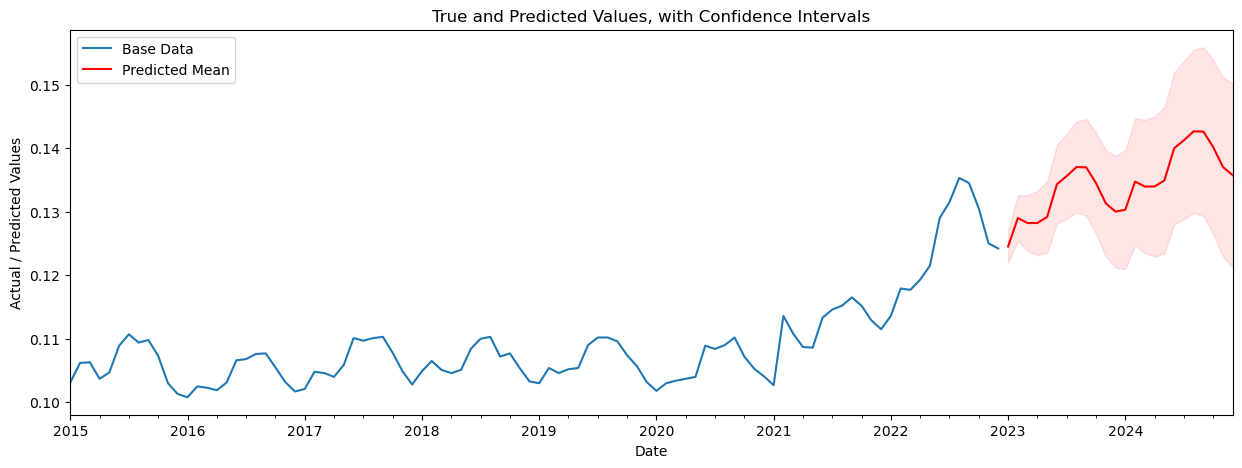

d0_D0_m0,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-01-01,0.124512,0.001291,0.121981,0.127043
2023-02-01,0.128995,0.001826,0.125416,0.132574
2023-03-01,0.128203,0.002237,0.123819,0.132586
2023-04-01,0.128214,0.002583,0.123152,0.133276
2023-05-01,0.129180,0.002887,0.123521,0.134839
2023-06-01,0.134319,0.003163,0.128119,0.140518
2023-07-01,0.135593,0.003416,0.128897,0.142289
2023-08-01,0.137016,0.003652,0.129857,0.144174
2023-09-01,0.136964,0.003874,0.129371,0.144556
2023-10-01,0.134483,0.004083,0.126480,0.142487


In [29]:
fig, ax = plt.subplots(figsize=(15,5))
ax = us_elec['commercial'][us_elec.index >= '2015-01-01'].plot(label='Base Data')
ax.set(
    title='True and Predicted Values, with Confidence Intervals',
    xlabel='Date',
    ylabel='Actual / Predicted Values'
)
preds_df['mean'].plot(ax=ax, style='r', label='Predicted Mean')
ax.fill_between(
    preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'],
    color='r', alpha=0.1
)
legend = ax.legend(loc='upper left')
plt.show()

preds_df

In [30]:
#Selecting Model 14
model = SARIMAX(us_elec['commercial'], order = (1,1,1), seasonal_order=(1,0,1,12))
result = model.fit()
print(result.summary())

y_pred = result.get_forecast(24)
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['prediction'] = sarima.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

preds_df = (result.get_prediction(start='2023-01-01', end='2024-12-01').summary_frame())
print(preds_df.head())
print(y_pred_df)

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           d0_D0_m0   No. Observations:                  264
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1342.953
Date:                            Mon, 27 Mar 2023   AIC                          -2675.906
Time:                                    13:40:06   BIC                          -2658.045
Sample:                                01-01-2001   HQIC                         -2668.728
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1954      0.222      0.879      0.380      -0.240       0.631
ma.L1          0.1650      0.211   

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


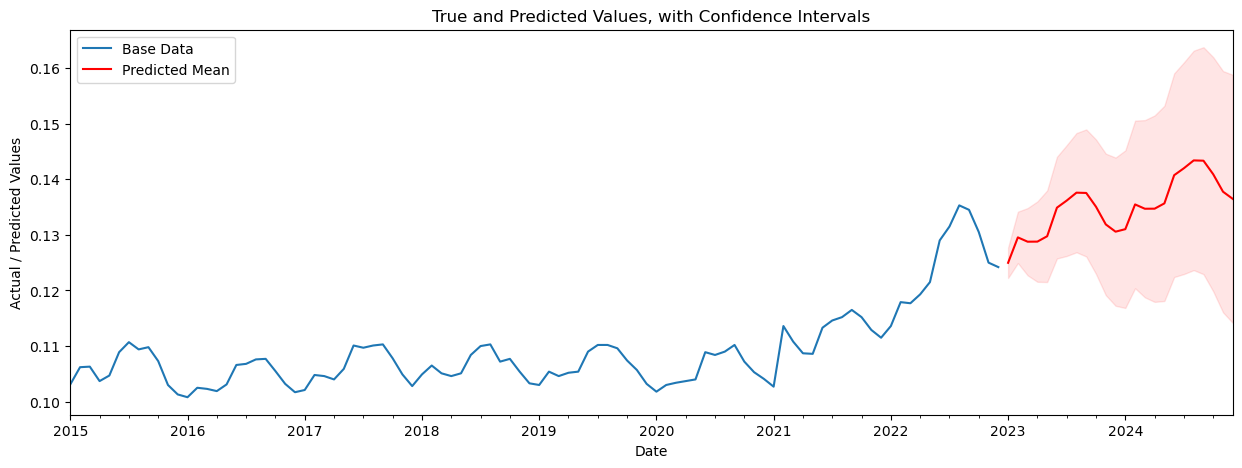

d0_D0_m0,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-01-01,0.124971,0.001395,0.122236,0.127705
2023-02-01,0.129543,0.002355,0.124927,0.134160
2023-03-01,0.128769,0.003087,0.122718,0.134820
2023-04-01,0.128783,0.003687,0.121558,0.136009
2023-05-01,0.129750,0.004203,0.121511,0.137988
2023-06-01,0.134888,0.004663,0.125748,0.144028
2023-07-01,0.136163,0.005082,0.126202,0.146123
2023-08-01,0.137585,0.005469,0.126867,0.148304
2023-09-01,0.137533,0.005830,0.126107,0.148959
2023-10-01,0.135053,0.006170,0.122961,0.147145


In [32]:
fig, ax = plt.subplots(figsize=(15,5))
ax = us_elec['commercial'][us_elec.index >= '2015-01-01'].plot(label='Base Data')
ax.set(
    title='True and Predicted Values, with Confidence Intervals',
    xlabel='Date',
    ylabel='Actual / Predicted Values'
)
preds_df['mean'].plot(ax=ax, style='r', label='Predicted Mean')
ax.fill_between(
    preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'],
    color='r', alpha=0.1
)
y_pred_df['prediction']
legend = ax.legend(loc='upper left')
plt.show()

preds_df

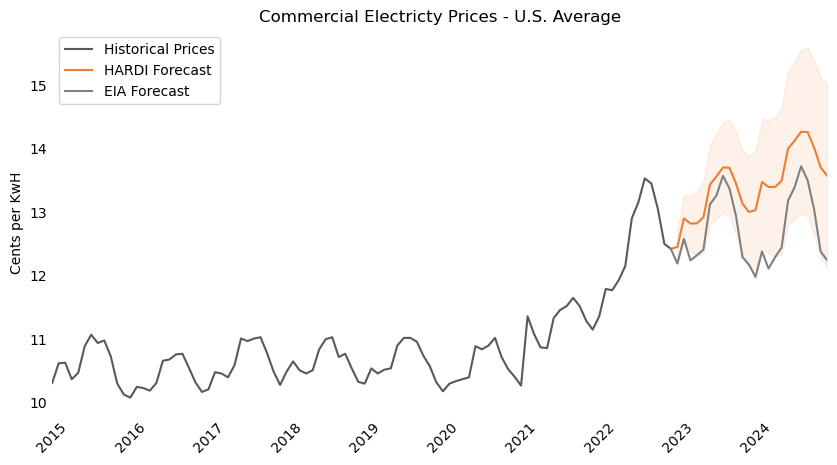

In [89]:
final = pd.read_excel(r'../Final Plots and Output.xlsx', header=0, sheet_name='Energy Price')
final.Month = pd.to_datetime(final.Month)
final.set_index('Month', inplace=True)

#print(final)

fig, ax = plt.subplots(figsize=(10,5))
ax = final['Commercial'][final.index >= '2015-01-01'].plot(style='#595959', label='Historical Prices')
final['Forecasted Mean'].plot(ax=ax, style='#ED7D31', label='HARDI Forecast')
ax.fill_between(
    final.index, final['Lower CI'], final['Upper CI'],
    color='#ED7D31', alpha=0.1
)
final['EIA Forecast'].plot(ax=ax, style='grey', label='EIA Forecast')
final['Forecasted Mean']
legend = ax.legend(loc='upper left')
plt.xticks(rotation=45)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set(
    title='Commercial Electricty Prices - U.S. Average',
    xlabel=None,
    ylabel='Cents per KwH'
)
plt.savefig(r'../Commercial Electricity Forecast Plot.png')
plt.show()